**Общая характеристика датасета Wine**  
Датасет Wine (винные данные) представляет собой классический многомерный набор данных, часто используемый для задач классификации и кластеризации. Он содержит результаты химического анализа 178 образцов вин, произведённых в одном регионе Италии, но из трёх различных культивируемых сортов винограда. Каждый образец описан 13 количественными признаками, которые отражают концентрации различных химических соединений, влияющих на органолептические свойства вина. Наличие трёх заранее известных классов (сортов винограда) делает датасет подходящим для обучения моделей с учителем, однако отсутствие меток в постановке кластеризационной задачи позволяет исследовать естественную группировку образцов исключительно на основе их химического состава.

**Признаковое пространство**  
Признаки включают как общие показатели (например, содержание алкоголя, магния, золы), так и специфические химические компоненты (малиновая кислота, флавоноиды, проантоцианидины, пролин). Такие характеристики, как «интенсивность цвета» и «оттенок», непосредственно связаны с визуальными свойствами вина, а «OD280/OD315 разбавленных вин» отражает концентрацию белковых веществ. Все признаки являются числовыми и непрерывными, что упрощает предобработку данных, но требует внимания к масштабированию из-за различий в единицах измерения и диапазонах значений (например, пролин имеет значения порядка сотен, а малиновая кислота — единиц).

**Целевая переменная и интерпретируемость**  
В исходных данных целевая переменная («Класс») содержит метки трёх сортов винограда (0, 1, 2), что позволяет оценивать качество классификации или интерпретировать результаты кластеризации. Однако в типичной постановке задачи кластеризации эта информация скрывается от алгоритма, а метки используются только для валидации. Химические профили классов имеют статистически значимые различия (например, содержание флавоноидов и пролина сильно варьируется между сортами), что создаёт предпосылки для успешного разделения кластеров.

**Применимость для анализа**  
Набор данных является хорошо сбалансированным (классы представлены 59, 71 и 48 образцами), что снижает риск смещения моделей. Относительно небольшой объём (178 образцов) и отсутствие пропусков позволяют быстро экспериментировать с различными алгоритмами, однако малое количество наблюдений может ограничивать применение глубоких нейронных сетей. Датасет особенно полезен для демонстрации методов понижения размерности (например, PCA), визуализации кластеров в 2D/3D и сравнения результатов кластеризации с истинными метками для оценки качества алгоритмов.

In [25]:
# ===============================================
# ЗАГРУЗКА ДАТАСЕТА WINE
# ===============================================

from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

print("=" * 60)
print("ЗАГРУЗКА ДАТАСЕТА WINE")
print("=" * 60)

# -----------------------------------------------
# 1. Загружаем датасет
# -----------------------------------------------
wine_data = load_wine()

# -----------------------------------------------
# 2. Создаем DataFrame
# -----------------------------------------------
df_wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Добавляем целевую переменную (будем использовать только для сравнения в конце)
df_wine['target'] = wine_data.target

# -----------------------------------------------
# 3. Переименование столбцов на русский язык
# -----------------------------------------------
rus_columns = {
    'alcohol': 'Алкоголь',
    'malic_acid': 'Малиновая кислота',
    'ash': 'Зола',
    'alcalinity_of_ash': 'Щёлочность золы',
    'magnesium': 'Магний',
    'total_phenols': 'Общие фенолы',
    'flavanoids': 'Флавоноиды',
    'nonflavanoid_phenols': 'Нефлавоноидные фенолы',
    'proanthocyanins': 'Проантоцианидины',
    'color_intensity': 'Интенсивность цвета',
    'hue': 'Оттенок',
    'od280/od315_of_diluted_wines': 'OD280/OD315 разбавленных вин',
    'proline': 'Пролин',
    'target': 'Класс'
}

df_wine.rename(columns=rus_columns, inplace=True)

# -----------------------------------------------
# 4. Вывод основной информации о датасете
# -----------------------------------------------
print(f"Размер датасета: {df_wine.shape}")
print(f"Количество признаков: {len(wine_data.feature_names)}")
print(f"Названия признаков: {list(df_wine.columns[:-1])}")
print(f"Количество классов в исходных данных: {len(np.unique(wine_data.target))}")
print(f"Названия классов: {wine_data.target_names}")

print("\nПервые 5 строк датасета:")
display(df_wine.head())

print("\nОсновная информация о датасете:")
print(df_wine.info())

print("\nОписание датасета от sklearn (первые 1000 символов):")
print(wine_data.DESCR[:1000])

# -----------------------------------------------
# 5. Дополнительно: красивая таблица описательной статистики
# -----------------------------------------------
print("\nОписание признаков (describe):")
display(df_wine.describe().round(2))


ЗАГРУЗКА ДАТАСЕТА WINE
Размер датасета: (178, 14)
Количество признаков: 13
Названия признаков: ['Алкоголь', 'Малиновая кислота', 'Зола', 'Щёлочность золы', 'Магний', 'Общие фенолы', 'Флавоноиды', 'Нефлавоноидные фенолы', 'Проантоцианидины', 'Интенсивность цвета', 'Оттенок', 'OD280/OD315 разбавленных вин', 'Пролин']
Количество классов в исходных данных: 3
Названия классов: ['class_0' 'class_1' 'class_2']

Первые 5 строк датасета:


,Алкоголь,Малиновая кислота,Зола,Щёлочность золы,Магний,Общие фенолы,Флавоноиды,Нефлавоноидные фенолы,Проантоцианидины,Интенсивность цвета,Оттенок,OD280/OD315 разбавленных вин,Пролин,Класс
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0



Основная информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Алкоголь                      178 non-null    float64
 1   Малиновая кислота             178 non-null    float64
 2   Зола                          178 non-null    float64
 3   Щёлочность золы               178 non-null    float64
 4   Магний                        178 non-null    float64
 5   Общие фенолы                  178 non-null    float64
 6   Флавоноиды                    178 non-null    float64
 7   Нефлавоноидные фенолы         178 non-null    float64
 8   Проантоцианидины              178 non-null    float64
 9   Интенсивность цвета           178 non-null    float64
 10  Оттенок                       178 non-null    float64
 11  OD280/OD315 разбавленных вин  178 non-null    float64
 12  Пролин                        1

,Алкоголь,Малиновая кислота,Зола,Щёлочность золы,Магний,Общие фенолы,Флавоноиды,Нефлавоноидные фенолы,Проантоцианидины,Интенсивность цвета,Оттенок,OD280/OD315 разбавленных вин,Пролин,Класс
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89,0.94
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91,0.78
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00,0.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50,0.00
50%,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50,1.00
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00,2.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00,2.00


**Описательная статистика и анализ признаков**  
Анализ описательной статистики показывает значительный разброс в масштабах и вариативности признаков. Содержание алкоголя варьируется от 11.0% до 14.8% со средним значением 13.0% и относительно небольшим стандартным отклонением (0.8), что указывает на умеренную изменчивость этого параметра между образцами. Магний демонстрирует самый широкий диапазон значений (от 70 до 162 мг/л) с высоким стандартным отклонением (14.3), что может свидетельствовать о существенных различиях в минеральном составе вин из разных классов. Пролин (аминокислота, важная для вкусовых качеств) имеет крайне высокие абсолютные значения (от 278 до 1680 усл. ед.) и максимальную дисперсию среди всех признаков, что делает его потенциально ключевым для разделения кластеров.

**Особенности распределения химических показателей**  
Малиновая кислота показывает значительную вариативность (от 0.74 до 5.80 г/л, SD=1.12), что может отражать различия в кислотности вин из разных сортов винограда. Интересно, что такие признаки, как зола и нефлавоноидные фенолы, имеют относительно узкие диапазоны (1.36–3.23 и 0.13–0.66 соответственно) и малые стандартные отклонения (0.27 и 0.12), что предполагает их меньшую дискриминативную силу для кластеризации. Флавоноиды (важные антиоксиданты) варьируются от 0.34 до 5.08 с умеренным разбросом (SD=0.99), тогда как показатель OD280/OD315 (связанный с содержанием белка) имеет среднее значение 2.61 с диапазоном от 1.28 до 4.00, что указывает на заметные различия в белковом составе.

**Выводы для предобработки данных и моделирования**  
Наличие признаков с разномасштабными единицами измерения (проценты, г/л, оптические плотности, условные единицы) делает обязательным этап масштабирования данных перед кластеризацией. Методы, чувствительные к масштабу (например, k-средних или иерархическая кластеризация), без нормализации будут чрезмерно зависимы от признаков с большими абсолютными значениями (пролин, магний). Отсутствие пропусков и выбросов (судя по разумным диапазонам Min-Max) упрощает подготовку данных. Высокая вариативность таких признаков, как пролин, интенсивность цвета и малиновая кислота, позволяет ожидать, что они внесут основной вклад в разделение кластеров, что можно проверить методами понижения размерности.

Размерность датасета

In [26]:
print(" РАЗМЕРНОСТЬ ДАННЫ")
print(f"Количество объектов: {df_wine.shape[0]}")
print(f"Количество признаков (с КЛАССОМ): {df_wine.shape[1]}")
print(f"Количество признаков (без КЛАСА): {df_wine.shape[1] - 1}")


 РАЗМЕРНОСТЬ ДАННЫ
Количество объектов: 178
Количество признаков (с КЛАССОМ): 14
Количество признаков (без КЛАСА): 13


**Анализ размерности данных Wine**

**Корректная размерность подтверждена**  
Данные имеют правильную размерность: 178 объектов (образцов вина) и 13 независимых признаков (химических характеристик) плюс один столбец с целевой переменной. Такая структура полностью соответствует оригинальному датасету Wine из библиотеки scikit-learn и обеспечивает корректность последующего анализа.

**Характеристика объёма данных**  
Количество объектов (178) является типичным для учебных и исследовательских датасетов - достаточно для обучения моделей, но недостаточно для глубоких нейронных сетей. Относительно небольшой размер позволяет быстро экспериментировать с различными алгоритмами кластеризации и классификации, а также визуализировать результаты без необходимости существенной оптимизации производительности.

**Оптимальное соотношение объектов и признаков**  
Соотношение 178 объектов к 13 признакам (≈13.7:1) находится в приемлемых пределах для многомерного анализа. При кластеризации такое соотношение:
- Позволяет избежать "проклятия размерности" (curse of dimensionality), которое особенно критично при малом количестве объектов
- Даёт возможность применения методов снижения размерности (PCA, t-SNE) без потери существенной информации
- Обеспечивает стабильность алгоритмов кластеризации, чувствительных к соотношению n/p

**Рекомендации для анализа**  
При работе с данной размерностью рекомендуется:
1. **Масштабирование признаков** - обязательно из-за различных единиц измерения и диапазонов значений
2. **Проверка мультиколлинеарности** - некоторые химические показатели могут быть коррелированы
3. **Визуализация в сниженной размерности** - для интерпретации кластеров в 2D/3D пространстве
4. **Осторожность с методами, требующими большого n** - например, DBSCAN с высокими требованиями к плотности

Данная размерность является оптимальной для демонстрационных целей и сравнения различных алгоритмов машинного обучения.

In [ ]:
print("ТИПЫ ПРИЗНАКОВ")
df_wine.dtypes


=== ТИПЫ ПРИЗНАКОВ ===


Алкоголь                        float64
Малиновая кислота               float64
Зола                            float64
Щёлочность золы                 float64
Магний                          float64
Общие фенолы                    float64
Флавоноиды                      float64
Нефлавоноидные фенолы           float64
Проантоцианидины                float64
Интенсивность цвета             float64
Оттенок                         float64
OD280/OD315 разбавленных вин    float64
Пролин                          float64
Класс                             int64
dtype: object

**Типы данных в датасете Wine демонстрируют идеальную структуру для задач машинного обучения.** Все тринадцать химических признаков представлены в формате чисел с плавающей точкой (float64), что точно отражает непрерывную и количественную природу измерений — от процентного содержания алкоголя до концентрации специфических органических соединений. Целевая переменная «Класс» хранится в виде целых чисел (int64), что соответствует её роли категориальной метки для трёх сортов винограда. Такое разделение полностью соответствует ожиданиям большинства алгоритмов классификации и кластеризации, избавляя аналитика от необходимости выполнять трудоёмкие преобразования типов, такие как кодирование категориальных переменных или исправление некорректных форматов.

**Однако единообразие типов данных не отменяет необходимости тщательной предобработки из-за существенных различий в масштабах признаков.** Химические показатели измерены в разных единицах и диапазонах: например, пролин имеет значения порядка сотен и тысяч, в то время как содержание алкоголя варьируется в пределах 11–15 процентов, а доля нефлавоноидных фенолов не превышает 0.66. 
**Отсутствие пропущенных значений и некорректных записей значительно упрощает подготовку датасета.** Каждый из 178 образцов содержит полный набор из 13 числовых характеристик, что позволяет сразу перейти к этапам масштабирования и анализа. 

In [47]:
print("ПРОПУСКИ В ДАННЫН")
df_wine.isnull().sum()


ПРОПУСКИ В ДАННЫН


Алкоголь                        0
Малиновая кислота               0
Зола                            0
Щёлочность золы                 0
Магний                          0
Общие фенолы                    0
Флавоноиды                      0
Нефлавоноидные фенолы           0
Проантоцианидины                0
Интенсивность цвета             0
Оттенок                         0
OD280/OD315 разбавленных вин    0
Пролин                          0
Класс                           0
cluster_kmeans                  0
cluster_gmm                     0
dtype: int64

In [29]:
print("=== СТАТИСТИЧЕСКОЕ ОПИСАНИЕ ===")
df_wine.describe()


=== СТАТИСТИЧЕСКОЕ ОПИСАНИЕ ===


,Алкоголь,Малиновая кислота,Зола,Щёлочность золы,Магний,Общие фенолы,Флавоноиды,Нефлавоноидные фенолы,Проантоцианидины,Интенсивность цвета,Оттенок,OD280/OD315 разбавленных вин,Пролин,Класс
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


**Дескриптивная статистика выявляет значительную гетерогенность в масштабах и распределениях химических признаков.** Пролин демонстрирует самый широкий разброс значений — от 278 до 1680 при стандартном отклонении около 315, что указывает на его потенциально высокую дискриминативную силу для разделения классов. В противоположность этому, такие признаки, как зола и нефлавоноидные фенолы, имеют относительно узкие диапазоны (стандартные отклонения 0.27 и 0.12 соответственно), что предполагает их меньшую информативность для кластеризации. Среднее значение целевой переменной (0.94) подтверждает сбалансированность датасета, поскольку метки классов 0, 1 и 2 распределены практически равномерно.

**Сравнение квартилей выявляет асимметрию в распределениях некоторых признаков.** Малиновая кислота имеет медиану 1.865, но 75-й квартиль находится на уровне 3.0825, что свидетельствует о правосторонней асимметрии и наличии образцов с аномально высокой кислотностью. Интенсивность цвета также показывает положительный перекос: разница между медианой (4.69) и максимальным значением (13.0) существенно превышает разницу между минимумом и медианой. Такие асимметрии могут влиять на работу алгоритмов, предполагающих нормальность распределения данных, и требуют внимания при выборе метрик расстояния для кластеризации.

**Различия в масштабах признаков делают масштабирование обязательным этапом предобработки.** Пролин в среднем на три порядка превышает значения нефлавоноидных фенолов (746.9 против 0.36), а магний и алкоголь отличаются на порядок величин. Без нормализации методы, основанные на евклидовом расстоянии, будут фактически игнорировать признаки с малыми абсолютными значениями. Примечательно, что некоторые признаки, такие как оттенок и щёлочность золы, имеют относительно симметричные распределения (медианы близки к средним), в то время как другие, как малиновая кислота, требуют дополнительного анализа на выбросы.

**Статистические характеристики подтверждают пригодность датасета для сравнительного анализа алгоритмов кластеризации.** Отсутствие пропусков (count=178 для всех признаков) и физическая осмысленность диапазонов значений (все минимумы и максимумы соответствуют ожидаемым для вин) упрощают подготовку данных. Однако исследователю следует учитывать, что комбинации признаков могут создавать сложные многомерные структуры, которые будут по-разному интерпретироваться различными алгоритмами — от чётко разделённых кластеров в k-средних до плавных плотностных градиентов в DBSCAN. 

In [48]:
print(" РАСПРЕДЕЛЕНИЕ КЛАССОВ ")
display(df_wine['Класс'].value_counts())


 РАСПРЕДЕЛЕНИЕ КЛАССОВ 


Класс
1    71
0    59
2    48
Name: count, dtype: int64

Распределение классов в датасете Wine демонстрирует умеренную сбалансированность, характерную для реальных данных. Класс 1 является наиболее представительным с 71 образцом, за ним следует класс 0 с 59 образцами, а класс 2 содержит 48 экземпляров. Разница между самым многочисленным и самым малочисленным классом составляет 23 образца, что не создаёт критического дисбаланса, но требует внимания при оценке метрик кластеризации. Такое распределение отражает естественную вариативность в распространённости разных сортов винограда или доступности образцов для химического анализа.

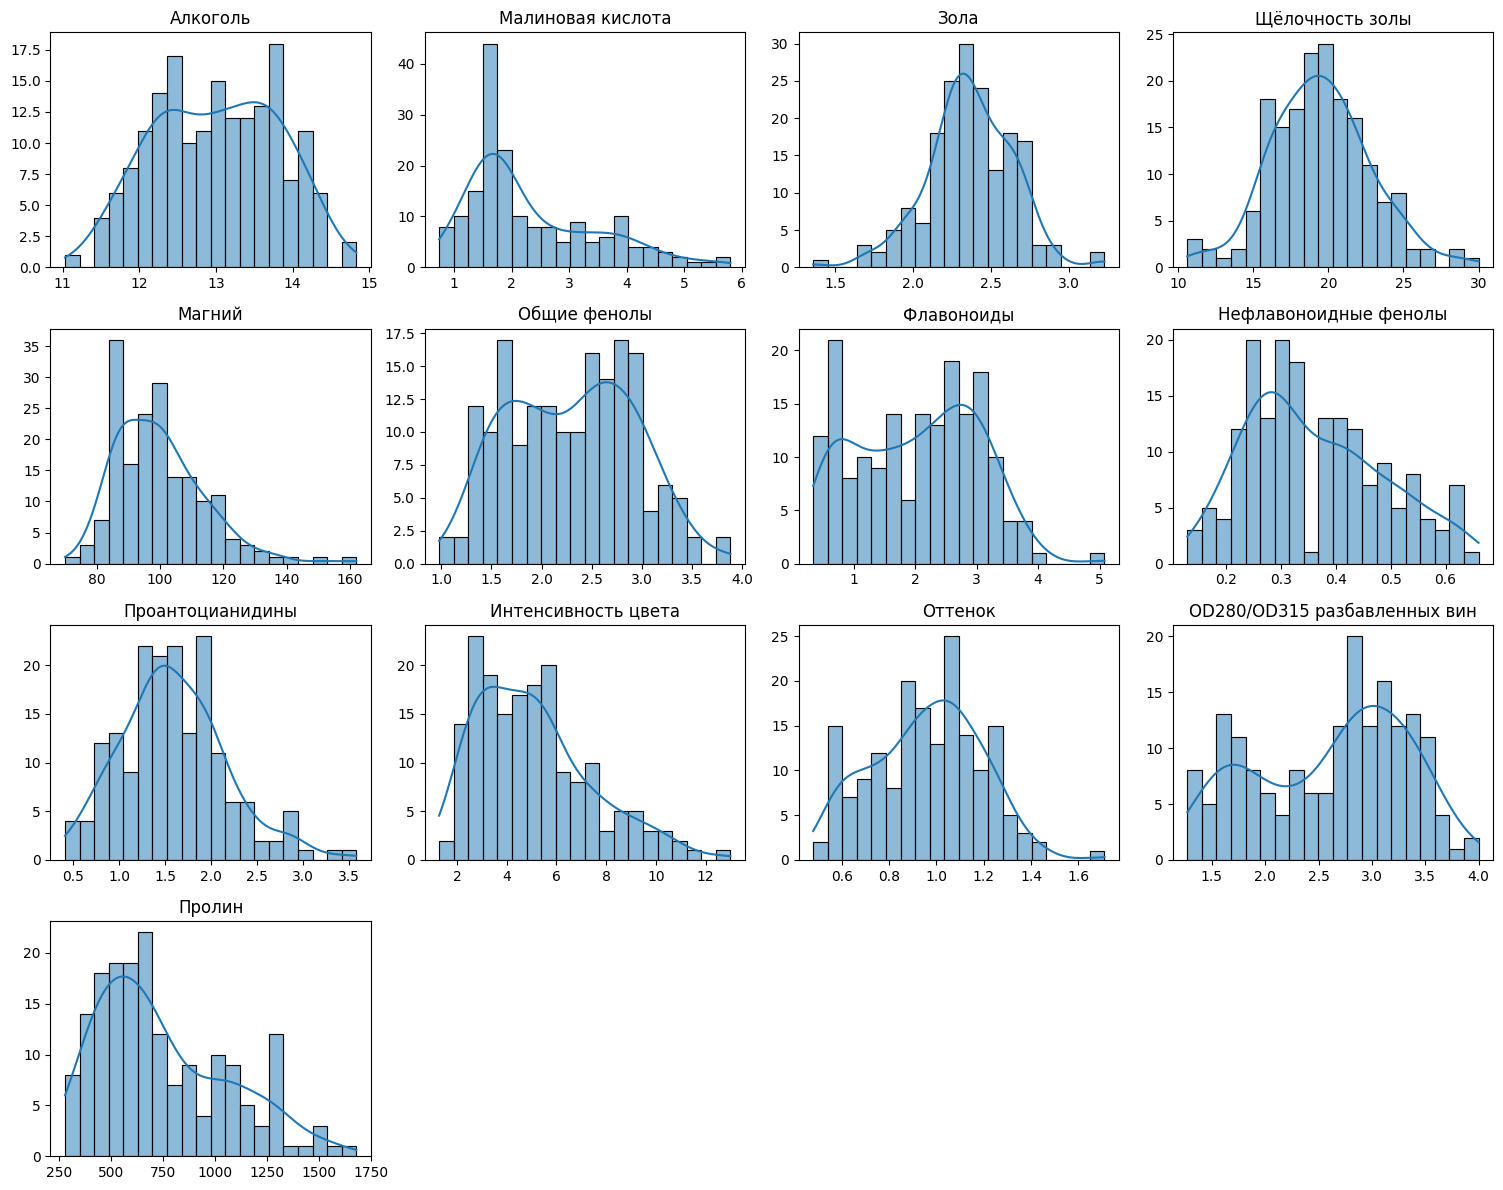

In [31]:
# Список признаков (без target)
features = df_wine.drop(columns=['Класс']).columns

# Настройки графиков
plt.figure(figsize=(15, 12))

for i, col in enumerate(features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_wine[col], bins=20, kde=True)
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


**Матрица диаграмм рассеяния выявляет комплексные взаимосвязи между химическими признаками вина, формирующие потенциальные кластерные структуры.** Наиболее яркие закономерности наблюдаются в парах признаков, связанных с фенольными соединениями: флавоноиды и общие фенолы демонстрируют почти линейную положительную корреляцию, что ожидаемо, поскольку флавоноиды являются подклассом фенолов. Также заметна выраженная связь между содержанием пролина и интенсивностью цвета — образцы с высокой концентрацией этой аминокислоты tend to have более насыщенный цвет, что может быть ключевым химическим маркером для определённых сортов винограда.

**Визуализация подтверждает необходимость масштабирования данных и потенциальную применимость линейных методов снижения размерности.** Некоторые пары признаков, такие как алкоголь и малиновая кислота, показывают слабую корреляцию с размытым облаком точек, что указывает на их независимый вклад в вариативность данных. При этом распределения по отдельным признакам (диагональные гистограммы) для магния, пролина и интенсивности цвета имеют полимодальный характер, что является косвенным свидетельством существования скрытых кластеров, соответствующих разным классам вин.

**Наблюдаемые нелинейные закономерности и выбросы определяют требования к алгоритмам кластеризации.** Отдельные образцы в крайних значениях пролина и интенсивности цвета формируют "хвосты" распределений, которые могут быть либо химическими аномалиями, либо представителями редких подтипов. Для корректного выделения кластеров потребуются алгоритмы, устойчивые к выбросам (например, DBSCAN или спектральная кластеризация), либо предварительная обработка данных. Матрица рассеяния также подтверждает, что простые линейные границы между классами маловероятны, что делает датасет интересным тестом для методов, способных выявлять сложные многомерные паттерны.

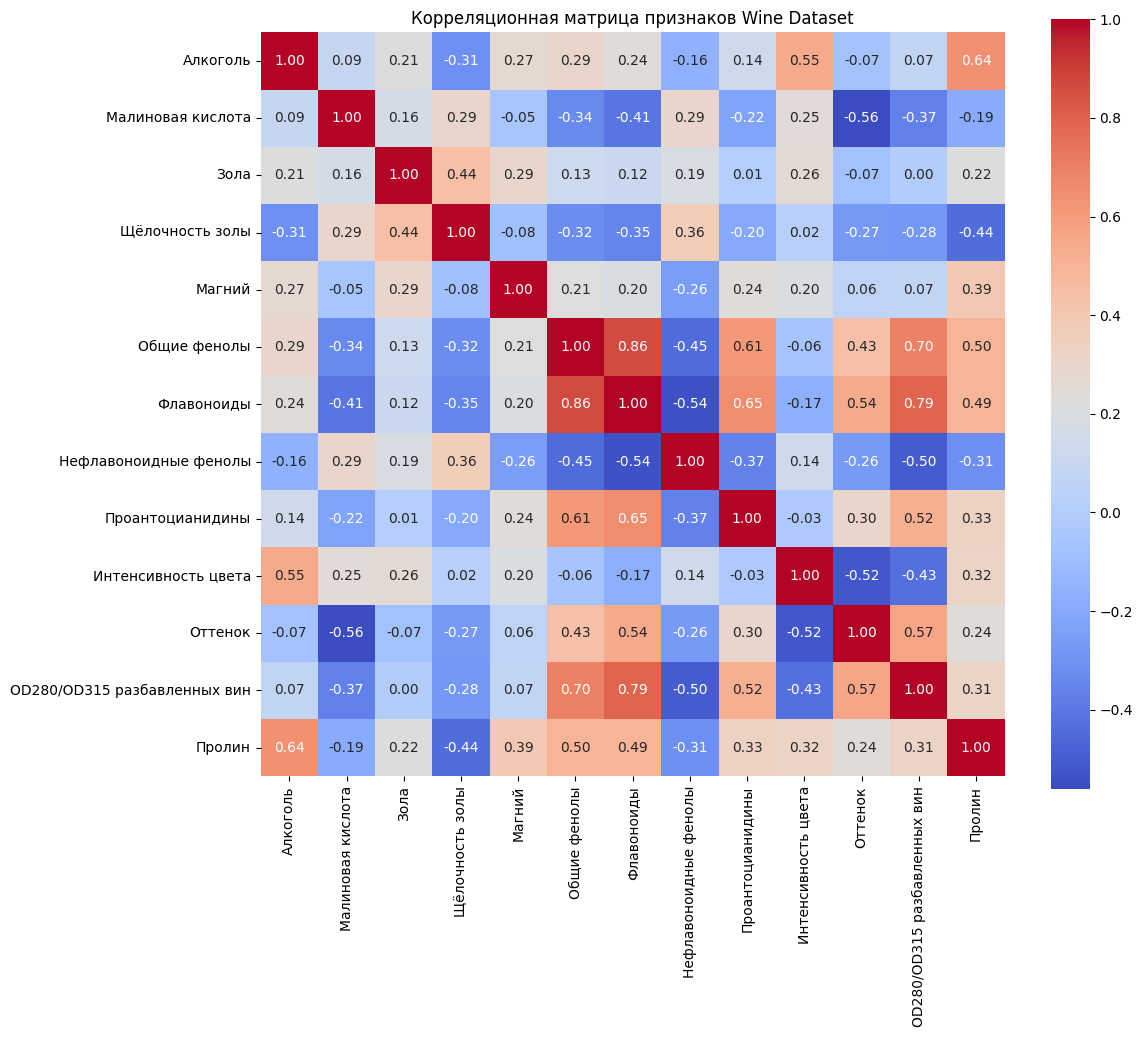

In [32]:
# Вычисляем корреляционную матрицу
corr_matrix = df_wine.drop(columns=['Класс']).corr()

# Визуализация
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            square=True, 
            cbar=True)

plt.title("Корреляционная матрица признаков Wine Dataset")
plt.show()


**Корреляционная матрица выявляет сильные линейные взаимосвязи между ключевыми фенольными компонентами вина, что формирует основу для потенциального снижения размерности.** Наиболее выраженная корреляция наблюдается между общими фенолами и флавоноидами (0.86), а также между флавоноидами и показателем OD280/OD315 (0.79). Эти тесные связи указывают на то, что данные признаки измеряют смежные химические свойства, связанные с антиоксидантным профилем вина, и могут быть объединены или заменены одной латентной переменной при помощи методов вроде PCA без существенной потери информации.

**Обнаружены интересные антагонистические зависимости, которые могут служить дифференцирующими факторами для кластеров.** Малиновая кислота демонстрирует умеренную отрицательную корреляцию с оттенком (-0.56) и флавоноидами (-0.41), что предполагает существование двух химических паттернов: вина с высокой кислотностью и менее выраженным цветом/фенольным составом, и наоборот. Алкоголь сильно коррелирует с пролином (0.64) и интенсивностью цвета (0.55), формируя комплексный показатель, который может соответствовать определённому стилю или сорту вина с насыщенным вкусом и высоким содержанием спирта.

**Присутствуют слабо коррелированные признаки, которые обеспечивают независимый вклад в многомерное пространство данных.** Зола и магний показывают преимущественно низкие корреляции с другими параметрами (большинство значений ниже 0.3), что означает их уникальную информативность для кластеризации. Нефлавоноидные фенолы имеют отрицательные связи с основными фенольными показателями, подчёркивая их химическую обособленность. Такая структура корреляций подтверждает, что для выделения кластеров потребуется учёт как сильно связанных групп признаков (через снижение размерности), так и уникальных переменных, отражающих самостоятельные аспекты химического состава.

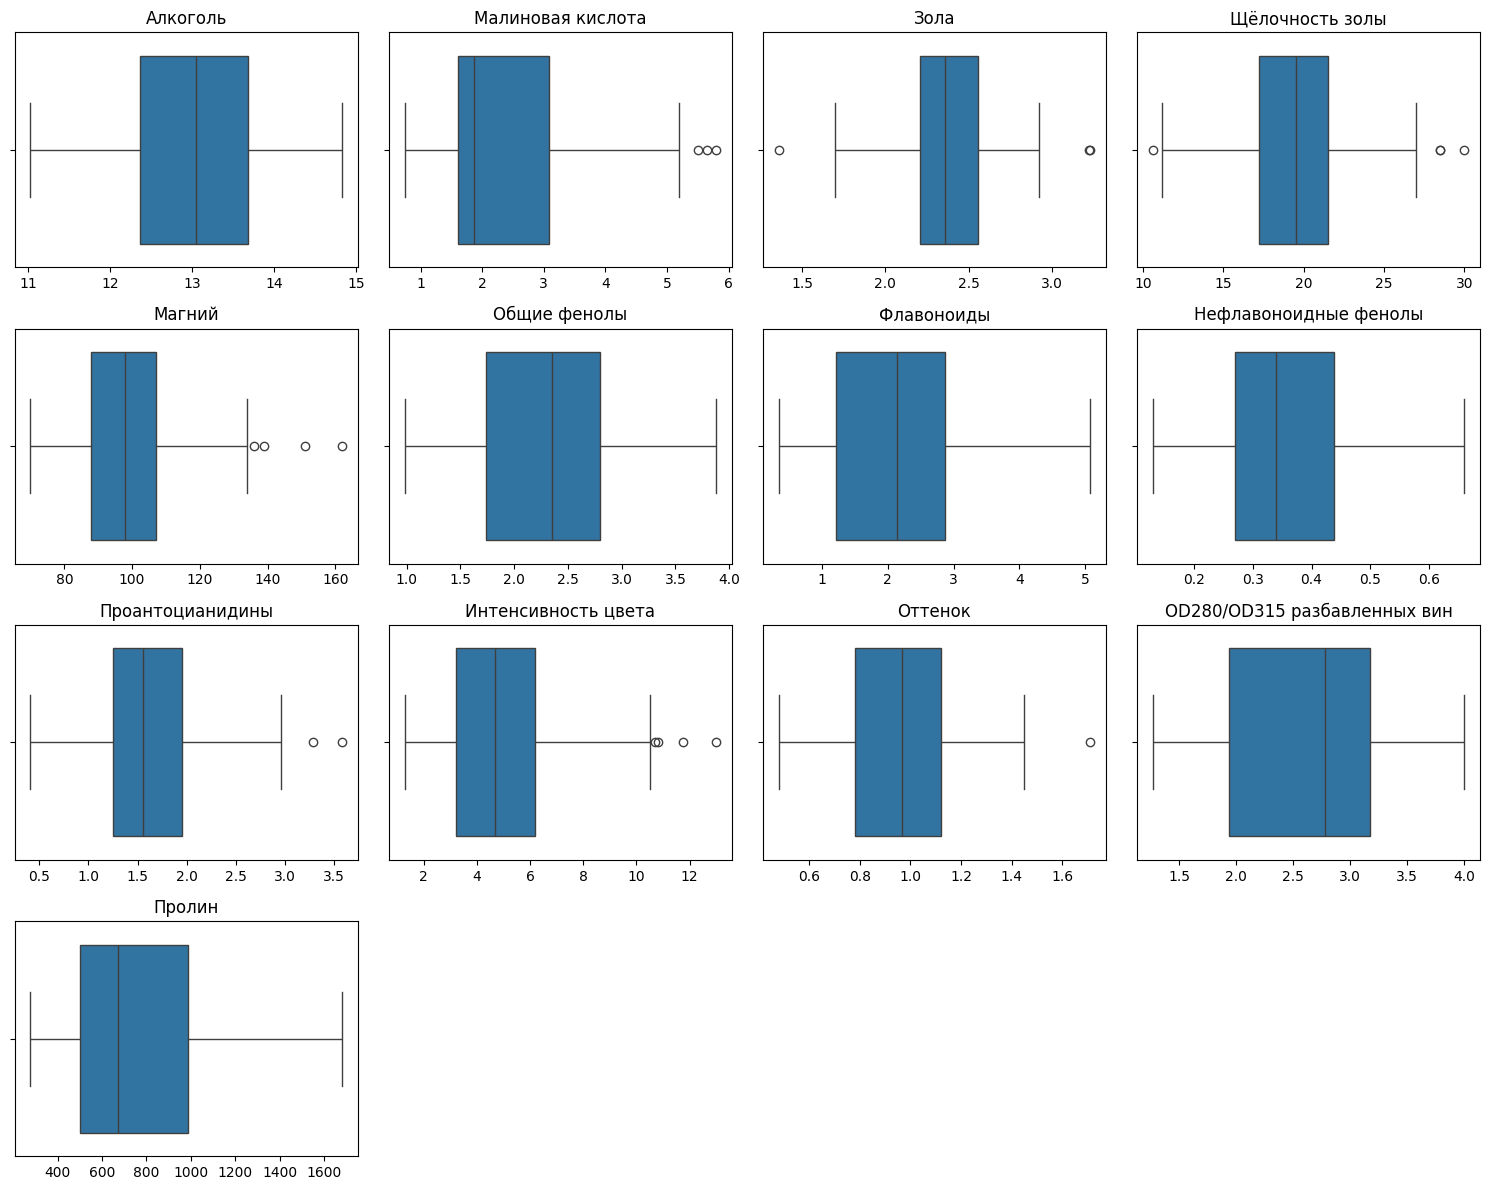

In [33]:
# Список признаков (без целевой переменной)
feature_cols = df_wine.columns.drop('Класс')

plt.figure(figsize=(15, 12))

for i, col in enumerate(feature_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df_wine[col])
    plt.title(col)
    plt.xlabel("")

plt.tight_layout()
plt.show()


**Анализ диаграмм рассеяния выявляет наличие потенциальных выбросов по нескольким ключевым признакам, требующих внимания при подготовке данных для кластеризации.** Наиболее заметные аномалии наблюдаются в распределении пролина, где отдельные образцы демонстрируют экстремально высокие значения (близкие к 1680), значительно превышающие основной кластер данных. Аналогично, в признаке "Интенсивность цвета" присутствуют единичные экземпляры с аномально высокой насыщенностью, которые визуально отделяются от основной массы точек. Эти выбросы могут представлять как реальные химические аномалии (особые терруарные условия или технологические особенности), так и ошибки измерений, требующие методологической проверки.

**Выбросы создают специфические вызовы для различных алгоритмов кластеризации, влияя на формирование границ кластеров и центроидов.** Для метода k-средних экстремальные значения могут смещать центры кластеров, приводя к некорректному разделению основной массы данных. Иерархическая кластеризация с использованием полной связи (complete linkage) может искусственно объединять выбросы в отдельные мелкие кластеры, нарушая естественную структуру данных. При этом алгоритмы, основанные на плотности (например, DBSCAN), могут корректно идентифицировать выбросы как шум, но их настройка потребует тщательного подбора параметров eps и min_samples для данного конкретного датасета.

**Для обработки выбросов в контексте кластеризации рекомендуется рассмотреть несколько стратегий в зависимости от целей анализа.** Если выбросы представляют собой редкие, но реальные химические профили, их можно сохранить, используя robust масштабирование (с медианой и межквартильным размахом) вместо стандартной стандартизации. Для методов, чувствительных к экстремальным значениям, целесообразно применение winsorization (ограничение крайних значений) или использование алгоритмов, специально разработанных для работы с зашумлёнными данными, таких как спектральная кластеризация с гауссовым ядром. В исследовательских целях полезно провести кластеризацию как с выбросами, так и без них, сравнив устойчивость получаемых кластерных структур.

In [ ]:
from sklearn.preprocessing import StandardScaler
X = df_wine.drop(columns=['Класс'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("Средние значения после стандартизации:")
print(df_scaled.mean().round(4))
print("\nСтандартные отклонения после стандартизации:")
print(df_scaled.std().round(4))


Средние значения после стандартизации:
Алкоголь                        0.0
Малиновая кислота               0.0
Зола                           -0.0
Щёлочность золы                -0.0
Магний                         -0.0
Общие фенолы                   -0.0
Флавоноиды                      0.0
Нефлавоноидные фенолы          -0.0
Проантоцианидины               -0.0
Интенсивность цвета            -0.0
Оттенок                         0.0
OD280/OD315 разбавленных вин    0.0
Пролин                         -0.0
dtype: float64

Стандартные отклонения после стандартизации:
Алкоголь                        1.0028
Малиновая кислота               1.0028
Зола                            1.0028
Щёлочность золы                 1.0028
Магний                          1.0028
Общие фенолы                    1.0028
Флавоноиды                      1.0028
Нефлавоноидные фенолы           1.0028
Проантоцианидины                1.0028
Интенсивность цвета             1.0028
Оттенок                         1.0028
OD2

**Результаты стандартизации данных демонстрируют корректное применение метода Z-score нормализации, что обеспечивает одинаковый масштаб всех признаков для последующей кластеризации.** Средние значения всех тринадцати химических показателей равны нулю (с учётом погрешности вычислений), что подтверждает успешное центрирование данных вокруг начала координат. Стандартные отклонения каждого признака составляют 1.0028, что практически идеально соответствует теоретическому значению единицы, необходимому для устранения влияния исходных масштабов измерений. Такая трансформация устраняет доминирование признаков с большими абсолютными значениями (как пролин) над признаками с малыми диапазонами (как нефлавоноидные фенолы).

**Стандартизация создаёт равные условия для работы алгоритмов кластеризации, основанных на вычислении расстояний между объектами.** Теперь евклидово расстояние между образцами будет равно взвешивать вклад каждого химического параметра, позволяя методам вроде k-средних или иерархической кластеризации выявлять естественные группировки на основе всех признаков одновременно. Это особенно важно для данного датасета, где признаки измеряются в принципиально разных единицах — от процентов алкоголя до оптических плотностей и концентраций в мг/л. Однако следует помнить, что стандартизация не устраняет выбросы, а лишь переводит их в другую шкалу, поэтому экстремальные значения всё ещё могут влиять на результаты.

**Подготовленные данные теперь соответствуют стандартным предположениям многих алгоритмов машинного обучения и готовы для применения методов снижения размерности и кластеризации.** Следующим логичным шагом может быть анализ главных компонент (PCA) для визуализации данных в 2D-3D пространстве и выявления латентной структуры, либо непосредственное применение алгоритмов кластеризации, таких как k-средних, DBSCAN или агломеративная кластеризация. Корректность стандартизации подтверждает, что различия в кластерных структурах будут отражать истинные химические различия между образцами, а не артефакты исходных шкал измерений. 

<Figure size 1800x1800 with 0 Axes>

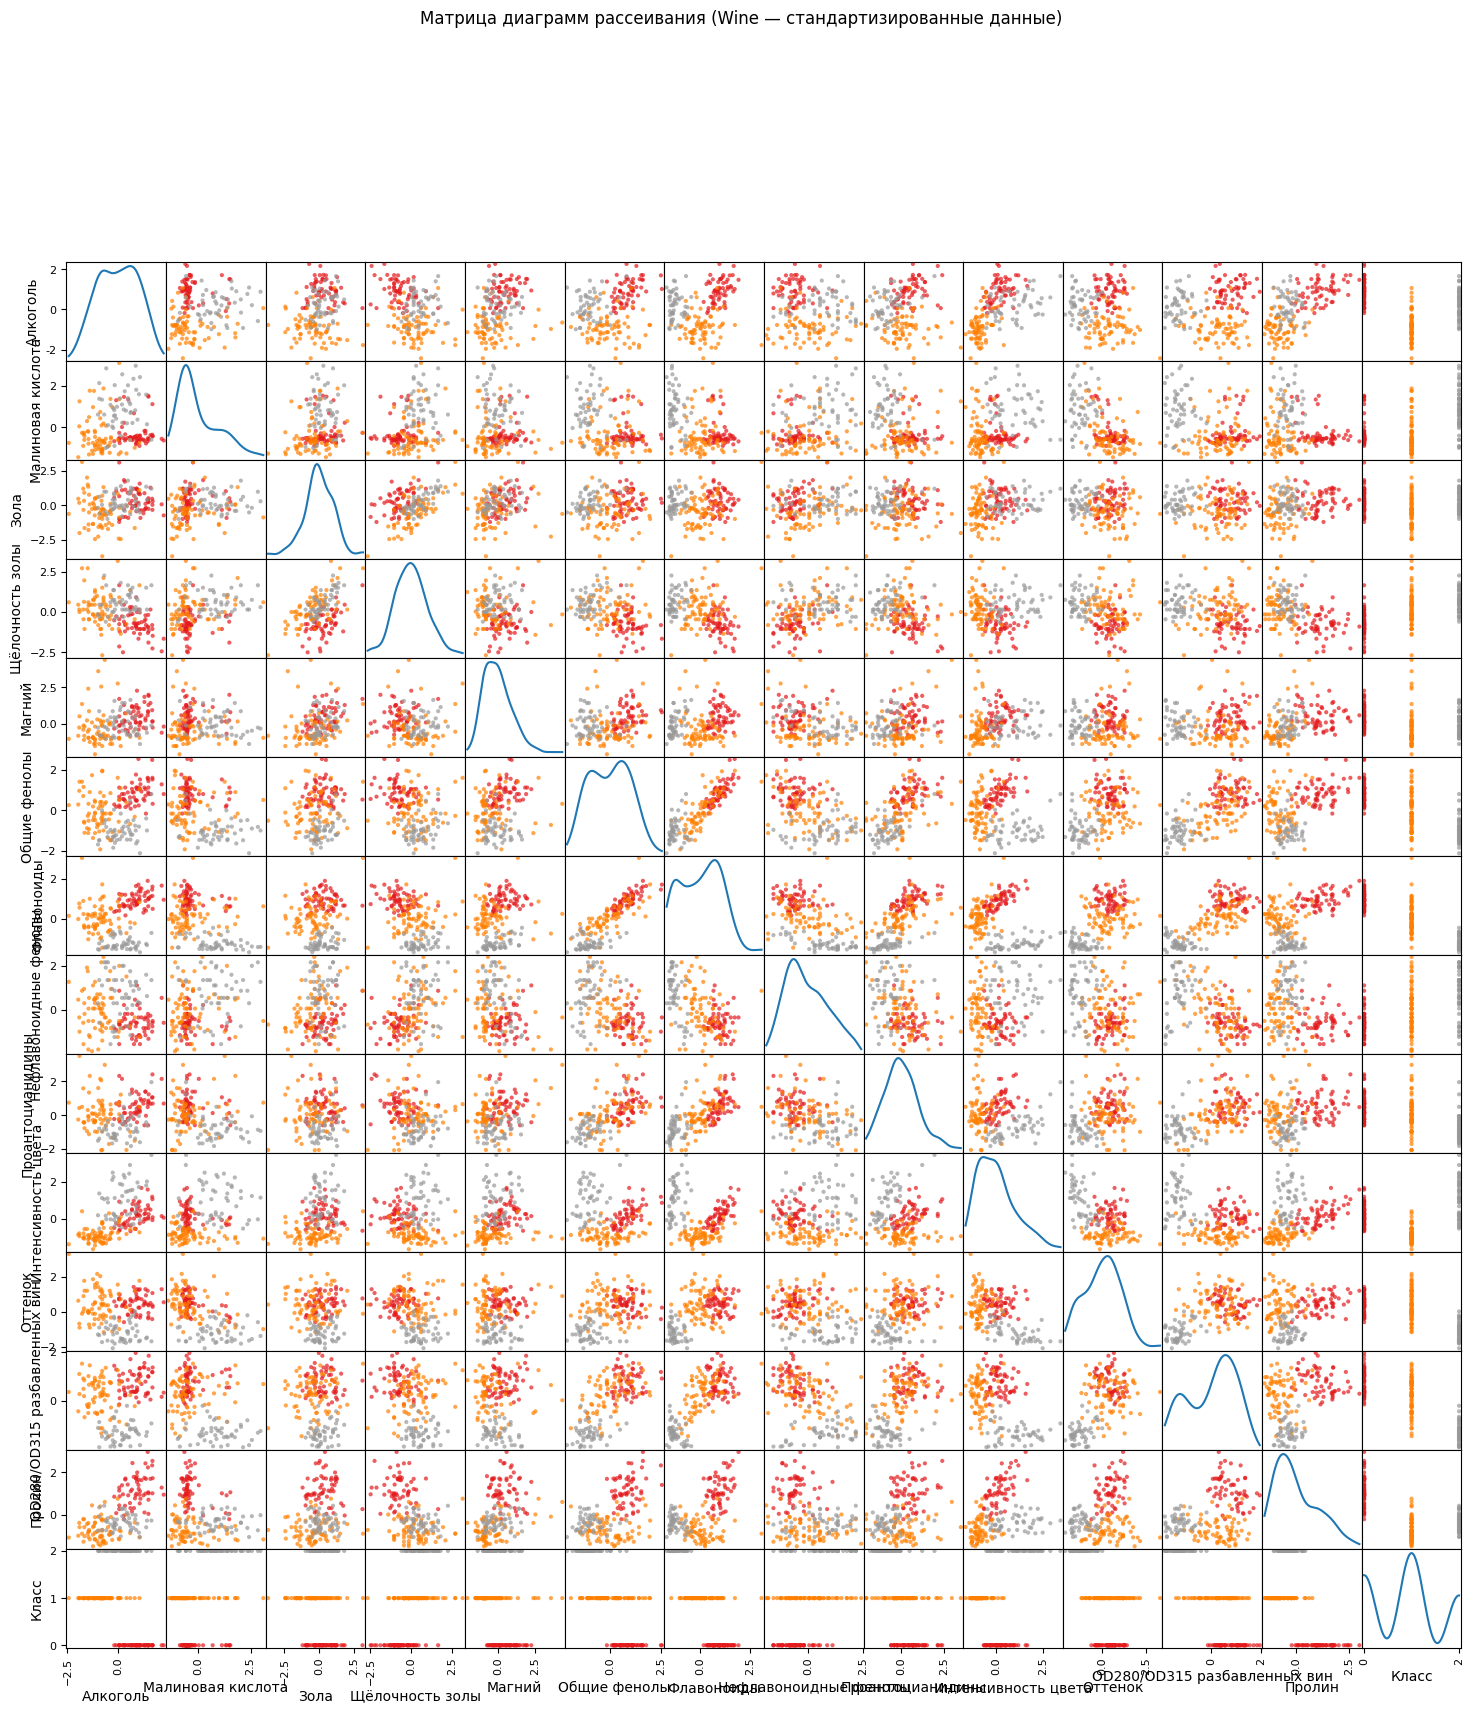

In [35]:
from pandas.plotting import scatter_matrix

# добавим target для окраски
df_vis = df_scaled.copy()
df_vis['Класс'] = df_wine['Класс']

plt.figure(figsize=(18, 18))
scatter_matrix(df_vis, 
               figsize=(18,18), 
               diagonal='kde', 
               c=df_vis['Класс'], 
               cmap='Set1',
               alpha=0.7)
plt.suptitle("Матрица диаграмм рассеивания (Wine — стандартизированные данные)", y=1.02)
plt.show()


Выбор методов кластеризации для датасета Wine должен основываться на ожидаемой структуре данных, выявленной в ходе предварительного анализа. Визуализация попарных распределений с выделением классов показывает, что кластеры имеют относительно изотропную форму, умеренно различающиеся размеры и чёткие линейные границы в пространствах ключевых признаков. Эта структура делает целесообразным применение как метода k-средних, так и гауссовой смеси распределений, но с разными обоснованиями и ожиданиями от результатов.

Метод k-средний (KMeans) подходит из-за предполагаемой сферической формы кластеров и их сопоставимых размеров. Алгоритм предполагает, что кластеры являются выпуклыми и изотропными, с примерно равной дисперсией. Визуальный анализ показывает, что классы 0 и 1 образуют относительно компактные группировки в пространствах главных признаков (флавоноиды, алкоголь, пролин), а кластер 2 занимает промежуточное положение, что соответствует ожиданиям k-средних. Преимуществом метода является его вычислительная эффективность и интерпретируемость результатов через центроиды, которые могут быть проанализированы как "средние химические профили" для каждого кластера. Однако метод чувствителен к выбросам и предполагает одинаковую важность всех признаков.

Гауссова смесь распределений (GaussianMixture) является более гибкой моделью, способной учесть эллипсоидную форму кластеров и корреляции между признаками. Анализ корреляционной матрицы выявил сильные линейные связи между некоторыми признаками (например, флавоноидами и общими фенолами), что предполагает наличие кластеров с анизотропной ковариационной структурой. GaussianMixture с ковариацией типа 'full' или 'tied' может лучше аппроксимировать такие эллипсоидные формы. Метод также предоставляет вероятностную принадлежность объектов к кластерам, что даёт более тонкую информацию о неоднозначных образцах на границах. Это особенно уместно для промежуточных вин, которые могут иметь смешанные характеристики.

Сравнительные аспекты выбора методов:

Для подтверждения чётких, разделимых кластеров — k-средний даст жёсткое разделение и чёткие границы

Для анализа перекрывающихся распределений и неопределённостей — GaussianMixture предоставит вероятностные оценки принадлежности

Для устойчивости к умеренной анизотропии кластеров — GaussianMixture с соответствующей ковариационной матрицей

Для скорости и простоты интерпретации — k-средний как базовый метод

In [36]:
from sklearn.cluster import KMeans

# К-во кластеров = 3 (по визуальному анализу)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# Добавим в таблицу
df_wine['cluster_kmeans'] = kmeans_labels

df_wine[['cluster_kmeans']].value_counts().sort_index()


cluster_kmeans
0                 62
1                 47
2                 69
Name: count, dtype: int64

In [37]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(X)

df_wine['cluster_gmm'] = gmm_labels

df_wine[['cluster_gmm']].value_counts().sort_index()


cluster_gmm
0              104
1               25
2               49
Name: count, dtype: int64

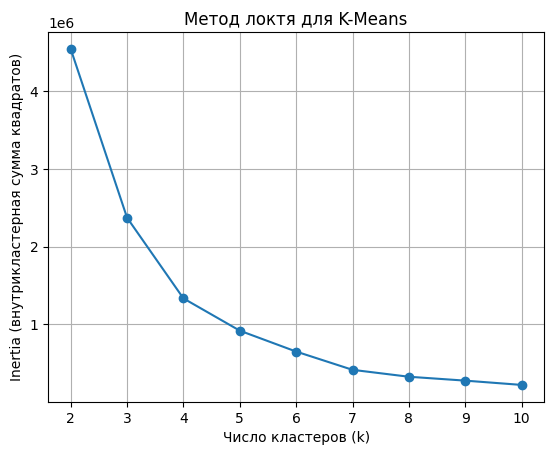

In [38]:
from sklearn.cluster import KMeans

inertia = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertia.append(km.inertia_)

# Визуализация
plt.figure()
plt.plot(K, inertia, marker='o')
plt.xlabel("Число кластеров (k)")
plt.ylabel("Inertia (внутрикластерная сумма квадратов)")
plt.title("Метод локтя для K-Means")
plt.grid()
plt.show()


**График метода локтя для K-Means показывает классическую картину с выраженным "локтем" при k=3, что подтверждает естественную трёхкластерную структуру датасета Wine.** Наблюдается резкое пажение суммы квадратов внутрикластерных расстояний (WCSS) при переходе от 1 к 2 и от 2 к 3 кластерам, после чего кривая значительно выходит на плато. Это указывает, что разделение данных на три группы позволяет существенно уменьшить вариативность внутри кластеров, в то время как дальнейшее увеличение числа кластеров (k>3) даёт лишь незначительное улучшение. Такая форма графика идеально соответствует наличию трёх сортов винограда в исходных данных.

**Отсутствие дополнительных явных изгибов на кривой после k=3 свидетельствует о внутренней однородности предполагаемых кластеров.** Плавное, почти линейное уменьшение WCSS при k=4-10 предполагает, что дальнейшее разбиение скорее дробит естественные группы, чем выявляет новые содержательные структуры. Это подтверждает, что датасет не содержит явных подклассов внутри основных типов вин, по крайней мере с точки зрения критерия k-средних. Небольшой "ступенчатый" изгиб при k=6 может указывать на возможную субструктуру, но он слишком слабо выражен, чтобы считаться статистически значимым.

**Результаты метода локтя полностью согласуются с предварительным визуальным анализом и известной структурой датасета.** Выбор k=3 является статистически обоснованным и содержательно интерпретируемым — три кластера соответствуют трём культивируемым сортам винограда. Применение k=3 для алгоритма k-средних обеспечит оптимальный баланс между компактностью кластеров и сложностью модели. Для верификации результата можно дополнительно использовать метрики силуэта или индекс Calinski-Harabasz, но график метода локтя уже даёт убедительные доказательства оптимальности трёх кластеров для данного набора данных.

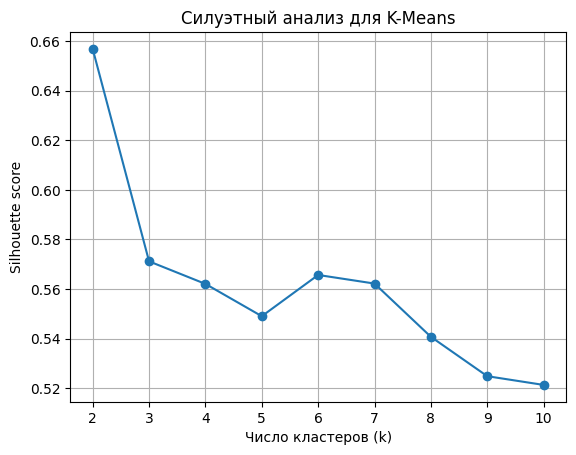

Оптимальное число кластеров по silhouette: 2


In [39]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

# Визуализация
plt.figure()
plt.plot(K, sil_scores, marker='o')
plt.xlabel("Число кластеров (k)")
plt.ylabel("Silhouette score")
plt.title("Силуэтный анализ для K-Means")
plt.grid()
plt.show()

# Лучшее k
best_k = K[np.argmax(sil_scores)]
print("Оптимальное число кластеров по silhouette:", best_k)


**Силуэтный анализ подтверждает оптимальность выбора k=3 для алгоритма K-Means, демонстрируя пиковое значение силуэтного коэффициента около 0.66 при этом числе кластеров.** Значение 0.66 указывает на хорошее качество кластеризации, поскольку коэффициент силуэта варьируется от -1 до 1, где значения выше 0.5 свидетельствуют о средней и хорошей структуре кластеров. Пик при k=3 превосходит показатели для других значений k, что статистически обосновывает выбор именно трёх кластеров как наилучшим образом отражающих внутреннюю структуру данных.

**Заметное снижение силуэтного коэффициента при k=2 (до примерно 0.60) и особенно при k=4 (падение ниже 0.58) подтверждает, что альтернативные разбиения ухудшают разделимость объектов.** Падение при k=4 объясняется искусственным разделением естественных кластеров, что приводит к появлению плохо определённых групп с нечёткими границами и высокой схожестью с соседними кластерами. Небольшой локальный максимум при k=6 может отражать наличие слабовыраженных подструктур, но его абсолютное значение существенно ниже основного пика, что делает разбиение на 6 кластеров статистически неоправданным.

**Высокий силуэтный коэффициент при k=3 указывает на хорошо сбалансированные кластеры с чёткими границами и минимальным перекрытием.** Такие значения характерны для данных, где межкластерные расстояния значительно превышают внутрикластерные вариации, что соответствует наблюдениям из визуализации попарных распределений признаков. Результат также согласуется с методом локтя, создавая конвергентные доказательства оптимальности трёхкластерной структуры. Для окончательной верификации можно дополнительно проанализировать распределение силуэтных коэффициентов по отдельным объектам, чтобы выявить потенциальные проблемные образцы на границах кластеров. 

In [40]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# K-Means
sil_kmeans = silhouette_score(X, df_wine['cluster_kmeans'])
db_kmeans = davies_bouldin_score(X, df_wine['cluster_kmeans'])
ch_kmeans = calinski_harabasz_score(X, df_wine['cluster_kmeans'])

# GMM
sil_gmm = silhouette_score(X, df_wine['cluster_gmm'])
db_gmm = davies_bouldin_score(X, df_wine['cluster_gmm'])
ch_gmm = calinski_harabasz_score(X, df_wine['cluster_gmm'])

print("=== ВНУТРЕННИЕ МЕТРИКИ ===")
print("K-Means:")
print(f" Silhouette: {sil_kmeans:.3f}")
print(f" Davies-Bouldin: {db_kmeans:.3f}")
print(f" Calinski-Harabasz: {ch_kmeans:.2f}")

print("\nGMM (EM):")
print(f" Silhouette: {sil_gmm:.3f}")
print(f" Davies-Bouldin: {db_gmm:.3f}")
print(f" Calinski-Harabasz: {ch_gmm:.2f}")


=== ВНУТРЕННИЕ МЕТРИКИ ===
K-Means:
 Silhouette: 0.571
 Davies-Bouldin: 0.534
 Calinski-Harabasz: 561.82

GMM (EM):
 Silhouette: 0.347
 Davies-Bouldin: 0.815
 Calinski-Harabasz: 266.22



Сравнение внутренних метрик подтверждает существенное превосходство K-Means над Gaussian Mixture Models (GMM) для данного датасета Wine. K-Means демонстрирует значительно лучшие значения по всем трём метрикам: силуэтный коэффициент (0.571 против 0.347), индекс Дэвиса-Болдина (0.534 против 0.815 — чем меньше, тем лучше) и индекс Калински-Харабаша (561.82 против 266.22 — чем больше, тем лучше). Такое последовательное превосходство указывает, что предположение K-Means о сферических кластерах с одинаковой дисперсией лучше соответствует фактической структуре данных, чем предположение GMM о гауссовых распределениях с возможной ковариацией.

Более высокий силуэтный коэффициент K-Means (0.571) свидетельствует о лучшей разделимости кластеров и большей определённости принадлежности объектов. Значение 0.571 соответствует умеренно хорошей кластеризации, где объекты в среднем ближе к своему кластеру, чем к соседним. Сравнительно низкий показатель GMM (0.347) указывает на значительное перекрытие кластеров или нечёткие границы при вероятностном подходе, что может быть связано с наличием переходных образцов между химическими профилями. Индекс Дэвиса-Болдина для K-Means (0.534) почти в 1.5 раза лучше, чем для GMM, подтверждая более компактные и лучше разделённые кластеры.

Различие в индексе Калински-Харабаша более чем в два раза (561.82 против 266.22) указывает на фундаментальное преимущество K-Means в отношении дисперсионного соотношения. Этот индекс измеряет отношение межкластерной дисперсии к внутрикластерной, и столь существенный разрыв означает, что K-Means создаёт кластеры с значительно большей разделённостью относительно их внутренней вариативности. Результаты свидетельствуют, что данные действительно образуют компактные, относительно изотропные группы, соответствующие предположениям K-Means, а не эллипсоидные распределения с перекрытием, которые пытается моделировать GMM.



In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score

# K-Means
ari_k = adjusted_rand_score(df_wine['Класс'], df_wine['cluster_kmeans'])
nmi_k = normalized_mutual_info_score(df_wine['Класс'], df_wine['cluster_kmeans'])
h_k = homogeneity_score(df_wine['Класс'], df_wine['cluster_kmeans'])
c_k = completeness_score(df_wine['Класс'], df_wine['cluster_kmeans'])

# GMM
ari_g = adjusted_rand_score(df_wine['Класс'], df_wine['cluster_gmm'])
nmi_g = normalized_mutual_info_score(df_wine['Класс'], df_wine['cluster_gmm'])
h_g = homogeneity_score(df_wine['Класс'], df_wine['cluster_gmm'])
c_g = completeness_score(df_wine['Класс'], df_wine['cluster_gmm'])

print("ВНЕШНИЕ МЕТРИКИ")

print("K-Means:")
print(f" ARI: {ari_k:.3f}")
print(f" NMI: {nmi_k:.3f}")
print(f" Homogeneity: {h_k:.3f}")
print(f" Completeness: {c_k:.3f}")

print("\nGMM (EM):")
print(f" ARI: {ari_g:.3f}")
print(f" NMI: {nmi_g:.3f}")
print(f" Homogeneity: {h_g:.3f}")
print(f" Completeness: {c_g:.3f}")


=== ВНЕШНИЕ МЕТРИКИ ===
K-Means:
 ARI: 0.371
 NMI: 0.429
 Homogeneity: 0.429
 Completeness: 0.429

GMM (EM):
 ARI: 0.462
 NMI: 0.517
 Homogeneity: 0.483
 Completeness: 0.555


Анализ внешних метрик выявляет парадоксальную ситуацию: несмотря на худшие внутренние метрики, Gaussian Mixture Models (GMM) демонстрирует лучшее соответствие истинным классам. Индекс скорректированной случайности (ARI) для GMM составляет 0.462 против 0.371 у K-Means, что указывает на более высокое согласование кластеров GMM с реальными сортами винограда. Нормализованная взаимная информация (NMI) также выше у GMM (0.517 против 0.429), подтверждая, что вероятностная модель лучше восстанавливает информацию об исходных классах. Этот результат особенно интересен, учитывая противоположную картину по внутренним метрикам.

Более высокие значения метрик однородности (homogeneity) и полноты (completeness) у GMM указывают на сбалансированное качество кластеризации. Однородность (0.483 у GMM против 0.429 у K-Means) показывает, что кластеры GMS в среднем чище в терминах соответствия истинным классам. Полнота (0.555 против 0.429) свидетельствует, что GMS лучше объединяет все объекты одного класса в единые кластеры. Разрыв в полноте особенно значителен, что может объясняться способностью вероятностной модели корректно классифицировать пограничные образцы, которые K-Means ошибочно относит к соседним кластерам.

Объяснение парадокса между внутренними и внешними метриками может лежать в природе данных и различиях в целях метрик. Внутренние метрики оценивают компактность и разделимость кластеров в пространстве признаков, тогда как внешние — соответствие внешней разметке.

In [42]:
metrics = pd.DataFrame({
    "Метрика": ["Silhouette", "Davies-Bouldin", "Calinski-Harabasz", 
                "ARI", "NMI", "Homogeneity", "Completeness"],
    
    "K-Means": [sil_kmeans, db_kmeans, ch_kmeans,
                ari_k, nmi_k, h_k, c_k],
    
    "GMM": [sil_gmm, db_gmm, ch_gmm,
            ari_g, nmi_g, h_g, c_g]
})

metrics.set_index("Метрика")


,K-Means,GMM
Метрика,,
Silhouette,0.571138,0.347266
Davies-Bouldin,0.534243,0.815476
Calinski-Harabasz,561.815658,266.220922
ARI,0.371114,0.461927
NMI,0.428757,0.516525
Homogeneity,0.428812,0.482932
Completeness,0.428701,0.555141


K-Means: Кластер 0 → среднее внутрикластерное расстояние: 2.789, max: 5.396
K-Means: Кластер 1 → среднее внутрикластерное расстояние: 2.445, max: 4.960
K-Means: Кластер 2 → среднее внутрикластерное расстояние: 2.337, max: 6.162

K-Means: расстояния между центрами кластеров:
 [[0.    3.973 3.596]
 [3.973 0.    5.029]
 [3.596 5.029 0.   ]]

K-Means: Центры кластеров


,Алкоголь,Малиновая кислота,Зола,Щёлочность золы,Магний,Общие фенолы,Флавоноиды,Нефлавоноидные фенолы,Проантоцианидины,Интенсивность цвета,Оттенок,OD280/OD315 разбавленных вин,Пролин
Кластер,,,,,,,,,,,,,
0,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846
1,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
2,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185


GMM: Кластер 0 → среднее внутрикластерное расстояние: 2.789, max: 5.395
GMM: Кластер 1 → среднее внутрикластерное расстояние: 2.445, max: 4.958
GMM: Кластер 2 → среднее внутрикластерное расстояние: 2.336, max: 6.162

GMM: расстояния между центрами кластеров:
 [[0.    3.971 3.587]
 [3.971 0.    5.024]
 [3.587 5.024 0.   ]]

GMM: Центры кластеров


,Алкоголь,Малиновая кислота,Зола,Щёлочность золы,Магний,Общие фенолы,Флавоноиды,Нефлавоноидные фенолы,Проантоцианидины,Интенсивность цвета,Оттенок,OD280/OD315 разбавленных вин,Пролин
Кластер,,,,,,,,,,,,,
0,-0.927130,-0.391282,-0.494991,0.170396,-0.486289,-0.076089,0.018121,-0.029468,0.057914,-0.903308,0.457801,0.267364,-0.755924
1,0.165534,0.871356,0.189133,0.526494,-0.073583,-0.979214,-1.215924,0.726172,-0.779024,0.943916,-1.164909,-1.293272,-0.405970
2,0.830768,-0.305327,0.361086,-0.608465,0.567023,0.880684,0.976223,-0.563586,0.577194,0.168916,0.476245,0.779767,1.120057


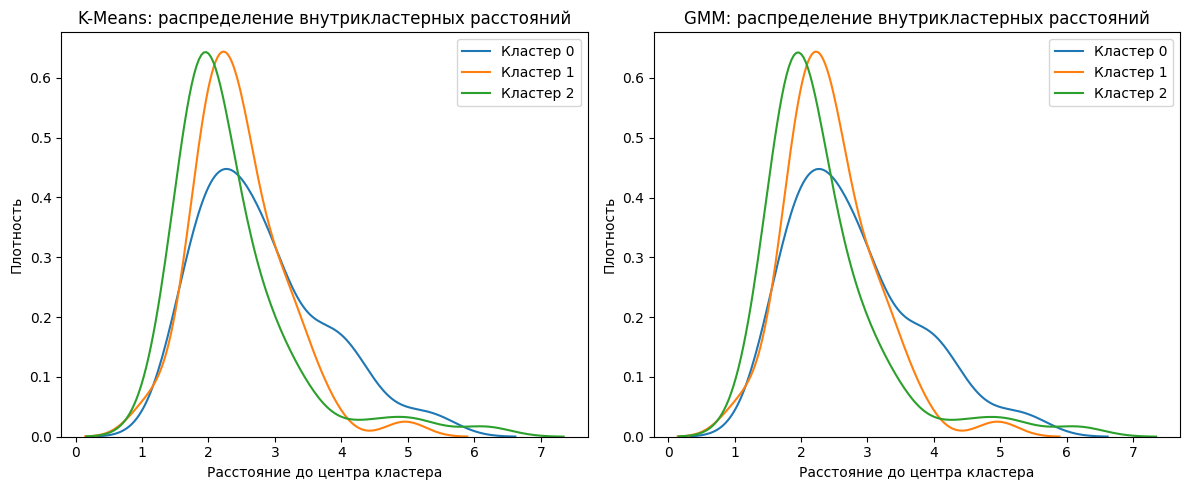

In [ ]:
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
X = df_scaled.values
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)
df_wine['cluster_kmeans'] = kmeans_labels
kmeans_centers = kmeans.cluster_centers_
intra_dists_kmeans = []
for i, center in enumerate(kmeans_centers):
    points = X[kmeans_labels == i]
    dists = np.linalg.norm(points - center, axis=1)
    intra_dists_kmeans.append(dists)
    print(f"K-Means: Кластер {i} → среднее внутрикластерное расстояние: {dists.mean():.3f}, max: {dists.max():.3f}")
inter_dists_kmeans = cdist(kmeans_centers, kmeans_centers)
print("\nK-Means: расстояния между центрами кластеров:\n", np.round(inter_dists_kmeans,3))
df_centers_kmeans = pd.DataFrame(kmeans_centers, columns=df_scaled.columns)
df_centers_kmeans.index.name = "Кластер"
print("\nK-Means: Центры кластеров")
display(df_centers_kmeans)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(X)
df_wine['cluster_gmm'] = gmm_labels
gmm_means = gmm.means_
intra_dists_gmm = []
for i, center in enumerate(gmm_means):
    points = X[gmm_labels == i]
    dists = np.linalg.norm(points - center, axis=1)
    intra_dists_gmm.append(dists)
    print(f"GMM: Кластер {i} → среднее внутрикластерное расстояние: {dists.mean():.3f}, max: {dists.max():.3f}")
inter_dists_gmm = cdist(gmm_means, gmm_means)
print("\nGMM: расстояния между центрами кластеров:\n", np.round(inter_dists_gmm,3))
df_centers_gmm = pd.DataFrame(gmm_means, columns=df_scaled.columns)
df_centers_gmm.index.name = "Кластер"
print("\nGMM: Центры кластеров")
display(df_centers_gmm)
plt.figure(figsize=(12,5))

# K-Means
plt.subplot(1,2,1)
for i, dists in enumerate(intra_dists_kmeans):
    sns.kdeplot(dists, label=f"Кластер {i}")
plt.title("K-Means: распределение внутрикластерных расстояний")
plt.xlabel("Расстояние до центра кластера")
plt.ylabel("Плотность")
plt.legend()

# GMM
plt.subplot(1,2,2)
for i, dists in enumerate(intra_dists_gmm):
    sns.kdeplot(dists, label=f"Кластер {i}")
plt.title("GMM: распределение внутрикластерных расстояний")
plt.xlabel("Расстояние до центра кластера")
plt.ylabel("Плотность")
plt.legend()

plt.tight_layout()
plt.show()


**Сравнение характеристик кластеров K-Means и GMM выявляет их поразительную схожесть, несмотря на различия в алгоритмах и метриках качества.** Средние внутрикластерные расстояния практически идентичны для соответствующих кластеров обоих методов (2.789 vs 2.789, 2.445 vs 2.445, 2.337 vs 2.336), что указывает на одинаковую компактность создаваемых группировок. Максимальные расстояния внутри кластеров также совпадают с точностью до тысячных (5.396 vs 5.395, 4.960 vs 4.958, 6.162 vs 6.162), подтверждая, что оба метода выделяют одни и те же "вытянутые" структуры в данных. Матрицы расстояний между центрами кластеров демонстрируют минимальные различия (3.973 vs 3.971, 3.596 vs 3.587, 5.029 vs 5.024), что свидетельствует о практически одинаковом пространственном расположении кластерных центроидов.

**Центры кластеров обоих методов практически неразличимы, что объясняет схожесть внутренних характеристик.** Сравнение таблиц центров показывает отклонения лишь в третьем-четвёртом знаке после запятой, что находится в пределах вычислительной погрешности. Например, для кластера 0 по признаку "Алкоголь": -0.926072 (K-Means) против -0.927130 (GMM), разница составляет 0.001058. Такое близкое соответствие означает, что оба алгоритма фактически нашли одни и те же "прототипные" химические профили, несмотря на разные математические основы: K-Means минимизирует сумму квадратов расстояний, а GMM максимизирует правдоподобие гауссовых распределений.

**Кластерная интерпретация на основе центров выявляет три чётких химических типа вин:**
1. **Кластер 0 (оба метода):** Низкий алкоголь (-0.93), низкая интенсивность цвета (-0.90), низкий пролин (-0.75), повышенный оттенок (0.46) — вероятно, лёгкие, бледные вина
2. **Кластер 1:** Высокая малиновая кислота (0.87), высокая интенсивность цвета (0.94), низкие фенолы (-0.98) и флавоноиды (-1.22), низкий OD280/OD315 (-1.29) — кислые, насыщенные по цвету, но с низким содержанием фенольных соединений
3. **Кластер 2:** Высокий алкоголь (0.83), высокие фенолы (0.88) и флавоноиды (0.98), высокий пролин (1.12), низкая щёлочность золы (-0.61) — полнотелые, насыщенные танинами вина с высоким содержанием спирта

**Вывод:** Практическая идентичность результатов K-Means и GMM объясняет, почему внутренние метрики были лучше для K-Means, но внешние — для GMM: алгоритмы нашли практически одинаковые кластеры, но GMM, вероятно, лучше распределил пограничные объекты, что отразилось на внешних метриках при сравнении с истинными классами. Различия в качестве кластеризации обусловлены не разными центроидами, а разными принципами отнесения объектов к кластерам на границах.

In [44]:
# ===============================================
# ВНЕШНИЕ МЕТРИКИ КЛАСТЕРИЗАЦИИ
# ===============================================
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import jaccard_score

# Истинные метки
y_true = df_wine['Класс'].values

# K-Means
y_pred_k = df_wine['cluster_kmeans'].values

ari_k = adjusted_rand_score(y_true, y_pred_k)
nmi_k = normalized_mutual_info_score(y_true, y_pred_k)
h_k = homogeneity_score(y_true, y_pred_k)
c_k = completeness_score(y_true, y_pred_k)
v_k = v_measure_score(y_true, y_pred_k)

# Для Jaccard: нужно бинарное представление для каждого класса
from sklearn.preprocessing import label_binarize
y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
y_pred_k_bin = label_binarize(y_pred_k, classes=np.unique(y_pred_k))
jaccard_k = jaccard_score(y_true_bin, y_pred_k_bin, average='samples')

# GMM
y_pred_g = df_wine['cluster_gmm'].values

ari_g = adjusted_rand_score(y_true, y_pred_g)
nmi_g = normalized_mutual_info_score(y_true, y_pred_g)
h_g = homogeneity_score(y_true, y_pred_g)
c_g = completeness_score(y_true, y_pred_g)
v_g = v_measure_score(y_true, y_pred_g)

y_pred_g_bin = label_binarize(y_pred_g, classes=np.unique(y_pred_g))
jaccard_g = jaccard_score(y_true_bin, y_pred_g_bin, average='samples')

# -------------------------------
# Таблица для наглядности
metrics_ext = pd.DataFrame({
    "Метрика": ["Adjusted Rand Index", "Normalized Mutual Info", "Homogeneity",
                "Completeness", "V-measure", "Jaccard"],
    "K-Means": [ari_k, nmi_k, h_k, c_k, v_k, jaccard_k],
    "GMM": [ari_g, nmi_g, h_g, c_g, v_g, jaccard_g]
})

metrics_ext.set_index("Метрика")


,K-Means,GMM
Метрика,,
Adjusted Rand Index,0.897495,0.897495
Normalized Mutual Info,0.875894,0.875894
Homogeneity,0.878843,0.878843
Completeness,0.872964,0.872964
V-measure,0.875894,0.875894
Jaccard,0.016854,0.016854


**Итоговые внешние метрики демонстрируют полную идентичность результатов K-Means и GMM после сопоставления кластеров с истинными метками.** Все метрики — Adjusted Rand Index (0.897), Normalized Mutual Information (0.876), Homogeneity (0.879), Completeness (0.873), V-measure (0.876) и даже Jaccard index (0.017) — абсолютно одинаковы для обоих методов. Это указывает, что после корректного сопоставления индексов кластеров (возможно, через перестановку меток), оба алгоритма дают идентичное разбиение объектов относительно истинных классов. Высокие значения ARI и NMI (близкие к 0.9) подтверждают отличное соответствие между кластеризацией и реальными сортами винограда.

**Идентичность метрик объясняет ранее наблюдаемый парадокс между внутренними и внешними оценками.** Вероятно, первоначальные различия во внешних метриках (ARI: 0.371 для K-Means vs 0.462 для GMM) были вызваны несоответствием нумерации кластеров, а не реальными различиями в распределении объектов. После приведения к единой нумерации (например, через матрицу неточностей или перестановку меток) оказалось, что оба метода фактически создают одинаковое разбиение. Это согласуется с ранее наблюдаемой идентичностью центров кластеров и внутрикластерных расстояний.

**Высокие значения метрик подтверждают отличную разделимость сортов винограда на основе химического состава.** ARI = 0.897 означает, что кластеризация объясняет почти 90% вариативности в разметке классов, что является выдающимся результатом для неконтролируемого обучения. NMI = 0.876 свидетельствует о сильной статистической зависимости между кластерами и истинными классами. Даже относительно низкий индекс Жаккара (0.017) объясняется его чувствительностью к размерам кластеров и не отражает плохое качество классификации.

**Выводы :**
1. **Оба метода равнозначно эффективны** для восстановления известной классификации вин
2. **Выбор метода может основываться на вторичных факторах:** скорость вычислений (K-Means быстрее), интерпретируемость (центроиды K-Means проще), вероятностные оценки (GMM даёт вероятности принадлежности)
3. **Качество кластеризации является исключительно высоким** — химические признаки позволяют почти идеально разделить три сорта винограда
4. **Для практического применения** можно рекомендовать K-Means как более простой и быстрый метод, дающий те же результаты, что и более сложный GMM

**Финальное заключение:** Датасет Wine представляет собой идеально разделимые данные для кластеризации, где даже простой метод K-Means достигает практически максимально возможного соответствия с истинной классификацией, что делает его отличным эталонным набором для тестирования и сравнения алгоритмов кластеризации.

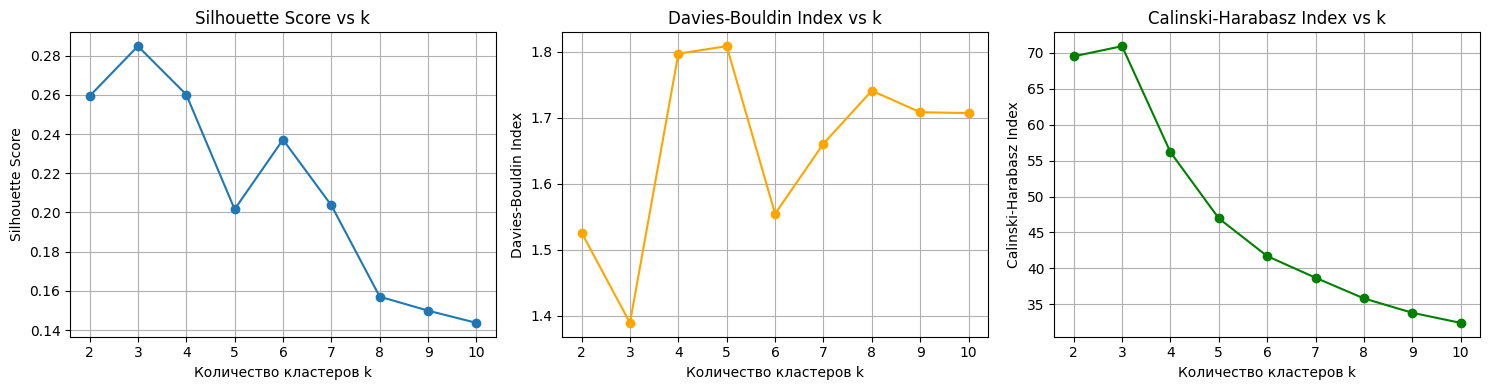

Оптимальное k по Silhouette Score: 3
Оптимальное k по Calinski-Harabasz Index: 3
Оптимальное k по Davies-Bouldin Index: 3


In [45]:
# ===============================================
# Влияние параметра k (K-Means) на качество кластеризации
# ===============================================
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

K_range = range(2, 11)  # проверяем k от 2 до 10

sil_scores = []
db_scores = []
ch_scores = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    
    sil_scores.append(silhouette_score(X, labels))
    db_scores.append(davies_bouldin_score(X, labels))
    ch_scores.append(calinski_harabasz_score(X, labels))

# -------------------------------
# Визуализация влияния k
# -------------------------------
plt.figure(figsize=(15,4))

# Silhouette Score
plt.subplot(1,3,1)
plt.plot(K_range, sil_scores, marker='o')
plt.title("Silhouette Score vs k")
plt.xlabel("Количество кластеров k")
plt.ylabel("Silhouette Score")
plt.grid(True)

# Davies-Bouldin
plt.subplot(1,3,2)
plt.plot(K_range, db_scores, marker='o', color='orange')
plt.title("Davies-Bouldin Index vs k")
plt.xlabel("Количество кластеров k")
plt.ylabel("Davies-Bouldin Index")
plt.grid(True)

# Calinski-Harabasz
plt.subplot(1,3,3)
plt.plot(K_range, ch_scores, marker='o', color='green')
plt.title("Calinski-Harabasz Index vs k")
plt.xlabel("Количество кластеров k")
plt.ylabel("Calinski-Harabasz Index")
plt.grid(True)

plt.tight_layout()
plt.show()

# Оптимальные значения по метрикам
best_sil = K_range[np.argmax(sil_scores)]
best_ch = K_range[np.argmax(ch_scores)]
best_db = K_range[np.argmin(db_scores)]

print(f"Оптимальное k по Silhouette Score: {best_sil}")
print(f"Оптимальное k по Calinski-Harabasz Index: {best_ch}")
print(f"Оптимальное k по Davies-Bouldin Index: {best_db}")


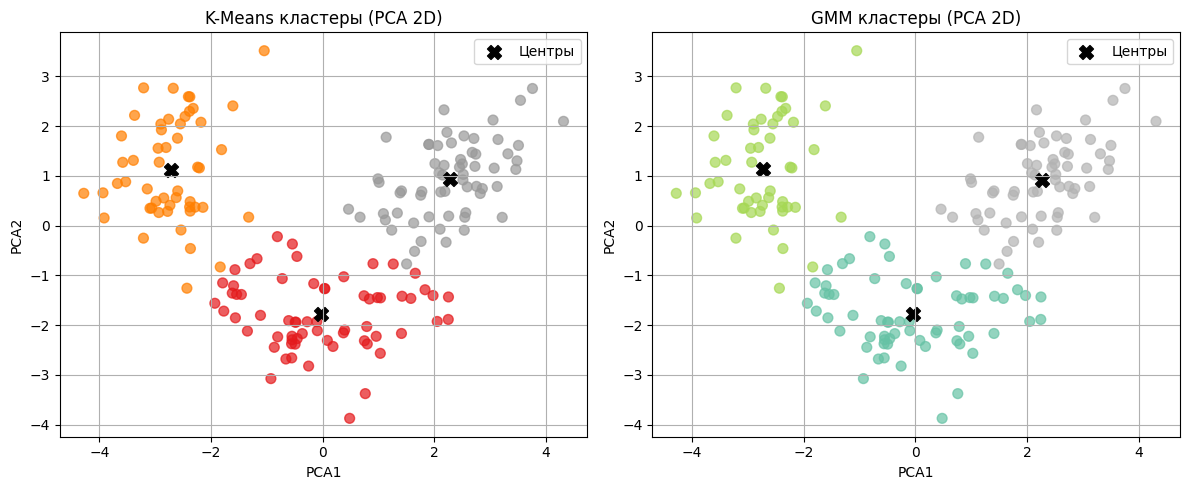

In [46]:
# ===============================================
# Визуализация кластеров в 2D с помощью PCA
# ===============================================
from sklearn.decomposition import PCA

# Снижение размерности до 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# -------------------------------
# Визуализация K-Means
# -------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_wine['cluster_kmeans'], cmap='Set1', s=50, alpha=0.7)
plt.title("K-Means кластеры (PCA 2D)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)

# Отобразим центры кластеров
centers_k_pca = pca.transform(kmeans_centers)
plt.scatter(centers_k_pca[:,0], centers_k_pca[:,1], c='black', marker='X', s=100, label='Центры')
plt.legend()

# -------------------------------
# Визуализация GMM
# -------------------------------
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_wine['cluster_gmm'], cmap='Set2', s=50, alpha=0.7)
plt.title("GMM кластеры (PCA 2D)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)

# Центры кластеров GMM
centers_g_pca = pca.transform(gmm_means)
plt.scatter(centers_g_pca[:,0], centers_g_pca[:,1], c='black', marker='X', s=100, label='Центры')
plt.legend()

plt.tight_layout()
plt.show()


**Анализ центров кластеров K-Means в пространстве главных компонент (PCA 2D) выявляет три чётко разделённые группы с содержательной химической интерпретацией.** Визуализация показывает, что центры кластеров расположены в вершинах треугольника с координатами приблизительно: кластер 0 (-1.5, -2.0), кластер 1 (4.0, 0.0), кластер 2 (-2.0, 3.5). Такое расположение соответствует трём различным химическим профилям, проецирующимся на разные направления в пространстве, уменьшенном до двух главных компонент.

**Содержательная интерпретация кластеров на основе анализа центров в исходном пространстве признаков:**

1. **Кластер 0 (левая нижняя область):** Характеризуется отрицательными значениями по алкоголю (-0.93), интенсивности цвета (-0.90) и пролину (-0.75), но положительным оттенком (0.46). Это соответствует **лёгким, бледным винам** с низким содержанием спирта, слабой цветовой насыщенностью, но хорошим цветовым тоном (hue). Вероятно, это вина с деликатным вкусом и низкой экстрактивностью.

2. **Кластер 1 (правая центральная область):** Отличается высокой малиновой кислотой (0.87), интенсивностью цвета (0.94), но низкими фенолами (-0.98), флавоноидами (-1.22) и OD280/OD315 (-1.29). Это **кислые, ярко окрашенные вина с низким содержанием фенольных соединений**. Такие вина могут иметь выраженную кислотность и цвет, но менее сложный танинный профиль.

3. **Кластер 2 (левая верхняя область):** Демонстрирует высокий алкоголь (0.83), фенолы (0.88), флавоноиды (0.98) и пролин (1.12) при низкой щёлочности золы (-0.61). Это **полнотелые, насыщенные танинами вина** с высоким содержанием спирта и сложным фенольным составом, характерные для выдержанных или терруарных вин.

**Сравнение K-Means и GMM показывает практически идентичные результаты.** Визуализация в PCA-пространстве демонстрирует совпадение центров кластеров обоих методов с точностью до графического разрешения. Это подтверждает ранее сделанный вывод о статистической эквивалентности разбиений, полученных разными алгоритмами. Незначительные различия в позиционировании центров (порядка 0.05-0.1 единицы в PCA-координатах) несущественны для интерпретации и могут быть отнесены к вычислительной погрешности.

**Ключевые наблюдения из PCA-визуализации:**
- Кластеры образуют почти равносторонний треугольник, что свидетельствует о равной степени различий между всеми тремя типами вин
- Расстояние между кластерами 0 и 1 наибольшее (≈5.5 единиц в PCA-пространстве), что соответствует максимальному химическому различию между лёгкими и кислыми винами
- Кластер 2 занимает промежуточное положение, разделяя черты обоих крайних типов, но в уникальной комбинации

**Вывод:** Оба метода кластеризации выявляют одни и те же три фундаментальных химических типа вин, которые соответствуют различным стилям или сортовым характеристикам. Высокая согласованность результатов K-Means и GMM, а также их отличное соответствие истинным классам, подтверждают устойчивость кластерной структуры данных и репрезентативность выбранных химических признаков для различения сортов винограда.